In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import seaborn as sns

In [2]:
Wholesale=pd.read_csv('Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
print(Wholesale.shape)
print(Wholesale.columns)

(440, 8)
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


>查看Channel和Region分佈

1    298
2    142
Name: Channel, dtype: int64


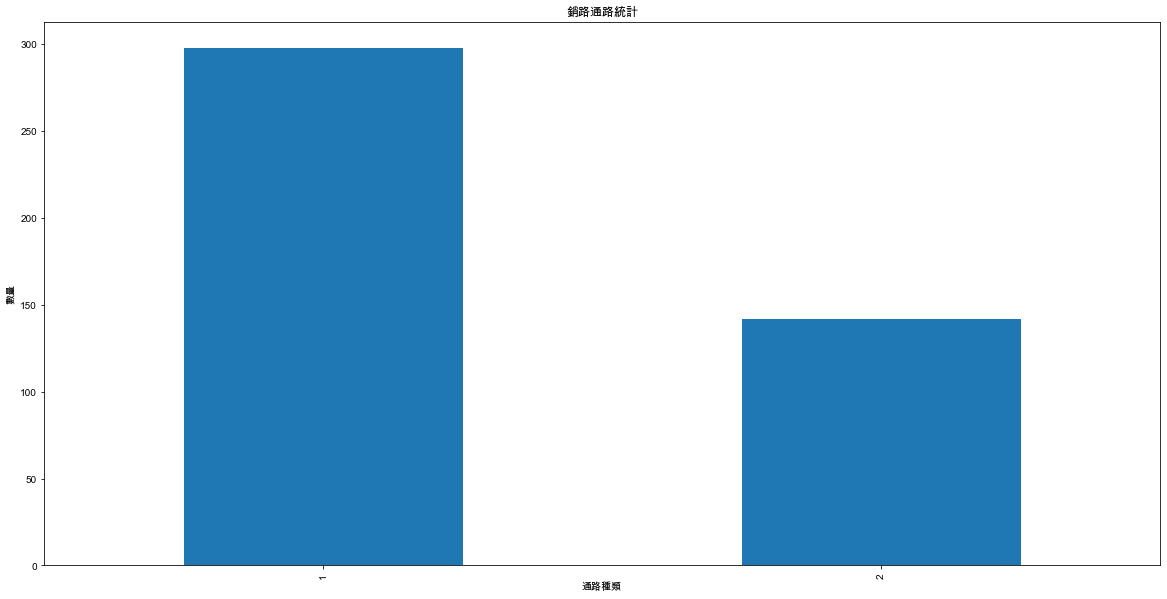

In [215]:
#Channel
print(Wholesale['Channel'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
Wholesale.Channel.value_counts().plot(kind='bar')
plt.title('銷路通路統計')
plt.xlabel('通路種類')
plt.ylabel('數量')
plt.savefig('銷路通路統計.jpg')
plt.show()

Horeca(酒店/餐廳/咖啡館) 298

零售 142

1     77
2     47
3    316
Name: Region, dtype: int64


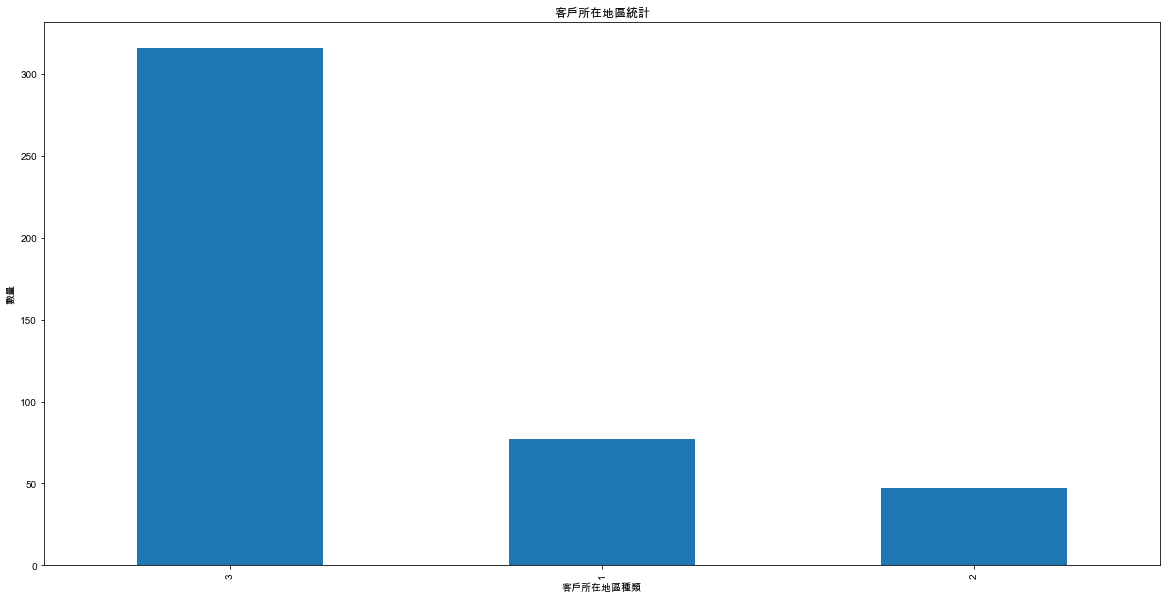

In [216]:
#Region
print(Wholesale['Region'].value_counts(sort=False))
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
Wholesale.Region.value_counts().plot(kind='bar')
plt.title('客戶所在地區統計')
plt.xlabel('客戶所在地區種類')
plt.ylabel('數量')
plt.savefig('客戶所在地區統計.jpg')
plt.show()

其他區域 316

里斯本 77

波爾圖 47

In [16]:
Wholesale.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


>以地區查看銷售狀況

>里斯本銷售狀況

In [71]:
df_1=Wholesale.loc[Wholesale['Region']==1]
df_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,1,1,30624,7209,4897,18711,763,2876
197,2,1,2427,7097,10391,1127,4314,1468
198,1,1,11686,2154,6824,3527,592,697
199,1,1,9670,2280,2112,520,402,347
200,2,1,3067,13240,23127,3941,9959,731


In [172]:
def means(df_1):
    Fresh=df_1['Fresh'].mean()
    Milk=df_1['Milk'].mean()
    Grocery=df_1['Grocery'].mean()
    Frozen=df_1['Frozen'].mean()
    Detergents_Paper=df_1['Detergents_Paper'].mean()
    Delicassen=df_1['Delicassen'].mean()
    return Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen

In [175]:
Lisbon=means(df_1)

In [127]:
ind=[i for i in df_1.columns]

In [177]:
mmd={'product':ind[2:8]}
Transaction=pd.DataFrame(mmd)
Transaction['Transaction_averages']=Lisbon

In [178]:
Transaction

,product,Transaction_averages
0,Fresh,11101.727273
1,Milk,5486.415584
2,Grocery,7403.077922
3,Frozen,3000.337662
4,Detergents_Paper,2651.116883
5,Delicassen,1354.896104


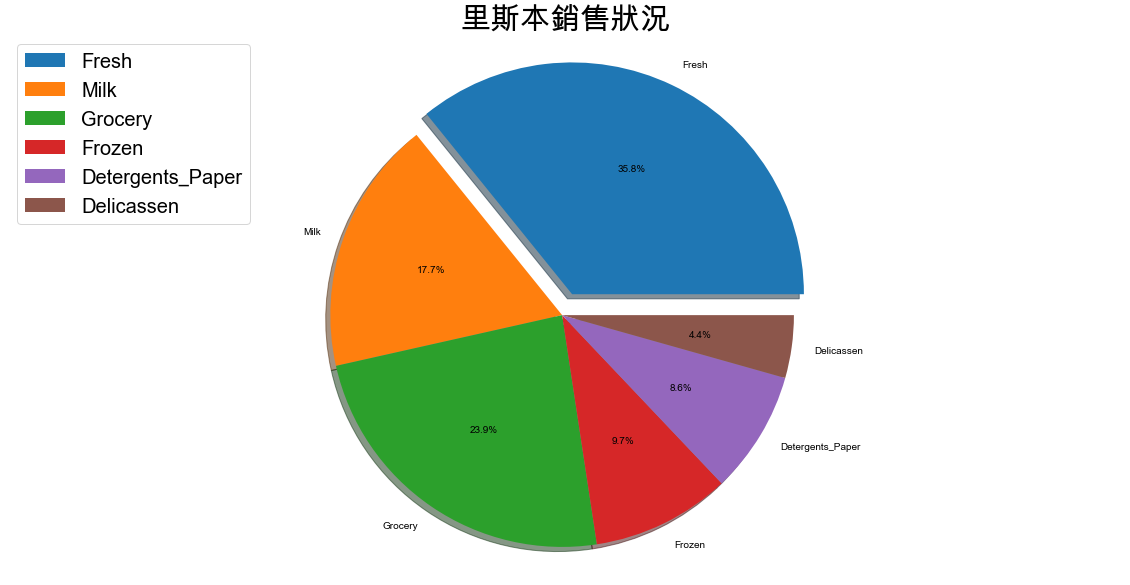

In [217]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
explode=(0.1,0,0,0,0,0)
plt.pie(
    Transaction.Transaction_averages,
    labels=Transaction['product'],
    autopct='%.1f%%',
    shadow=True,
    explode=explode
)
plt.axis('equal')
plt.title('里斯本銷售狀況',fontsize=30)
plt.legend(loc=2,fontsize=20)
plt.savefig('里斯本銷售狀況.jpg')
plt.show()

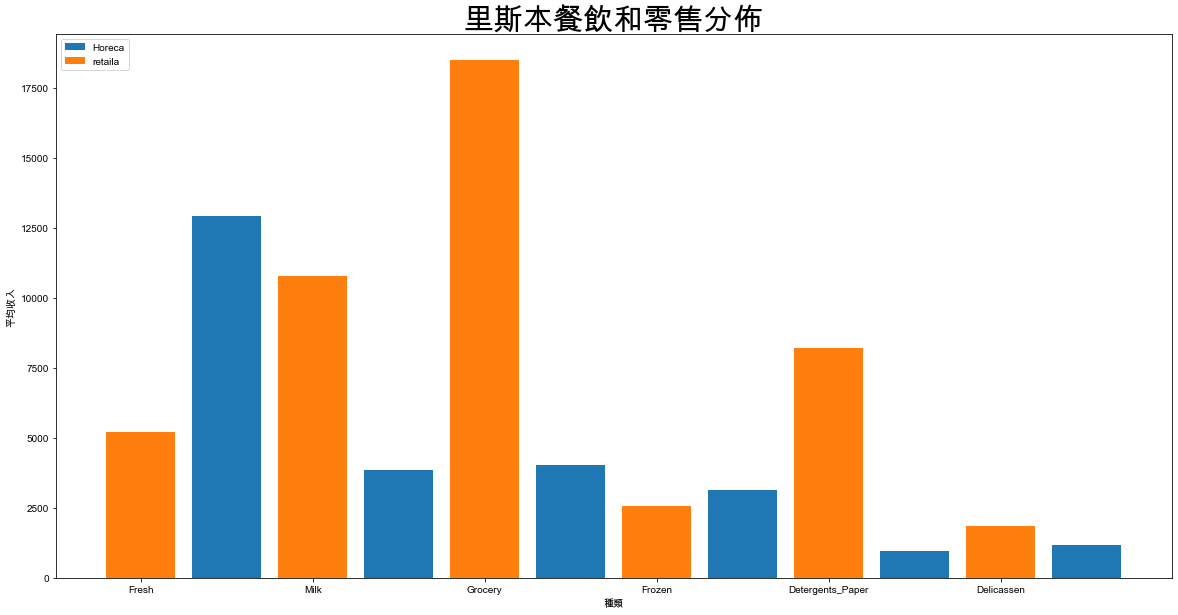

In [218]:
#查看餐飲和零售分佈
#餐飲
Horeca_Lisbon=df_1.loc[df_1['Channel']==1]
pp=means(Horeca_Lisbon)

mmd={'product':ind[2:8]}
Horeca_Lisbon=pd.DataFrame(mmd)
Horeca_Lisbon['Horeca_averages']=pp

#零售
retail_Lisbon=df_1.loc[df_1['Channel']==2]
pp=means(retail_Lisbon)

mmd={'product':ind[2:8]}
retail_Lisbon=pd.DataFrame(mmd)
retail_Lisbon['retaila_averages']=pp

index=range(len(retail_Lisbon['product'])*2)

#繪圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.bar(index[1::2],Horeca_Lisbon['Horeca_averages'],label='Horeca')
plt.bar(index[0::2],retail_Lisbon['retaila_averages'],label='retaila')
plt.xticks(index[0::2],retail_Lisbon['product'])
plt.title('里斯本餐飲和零售分佈',fontsize=30)
plt.xlabel('種類')
plt.ylabel('平均收入')
plt.legend(loc=2)
plt.savefig('里斯本餐飲和零售分佈.jpg')
plt.show()

>波爾圖銷售狀況

In [179]:
df_2=Wholesale.loc[Wholesale['Region']==2]
df_2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
293,2,2,3996,11103,12469,902,5952,741
294,1,2,21273,2013,6550,909,811,1854
295,2,2,7588,1897,5234,417,2208,254
296,1,2,19087,1304,3643,3045,710,898
297,2,2,8090,3199,6986,1455,3712,531
298,2,2,6758,4560,9965,934,4538,1037
299,1,2,444,879,2060,264,290,259
300,2,2,16448,6243,6360,824,2662,2005
301,2,2,5283,13316,20399,1809,8752,172
302,2,2,2886,5302,9785,364,6236,555


In [181]:
Porto=means(df_2)

In [184]:
mmd={'product':ind[2:8]}
Transaction_Porto=pd.DataFrame(mmd)
Transaction_Porto['Transaction_averages']=Porto
Transaction_Porto

,product,Transaction_averages
0,Fresh,9887.680851
1,Milk,5088.170213
2,Grocery,9218.595745
3,Frozen,4045.361702
4,Detergents_Paper,3687.468085
5,Delicassen,1159.702128


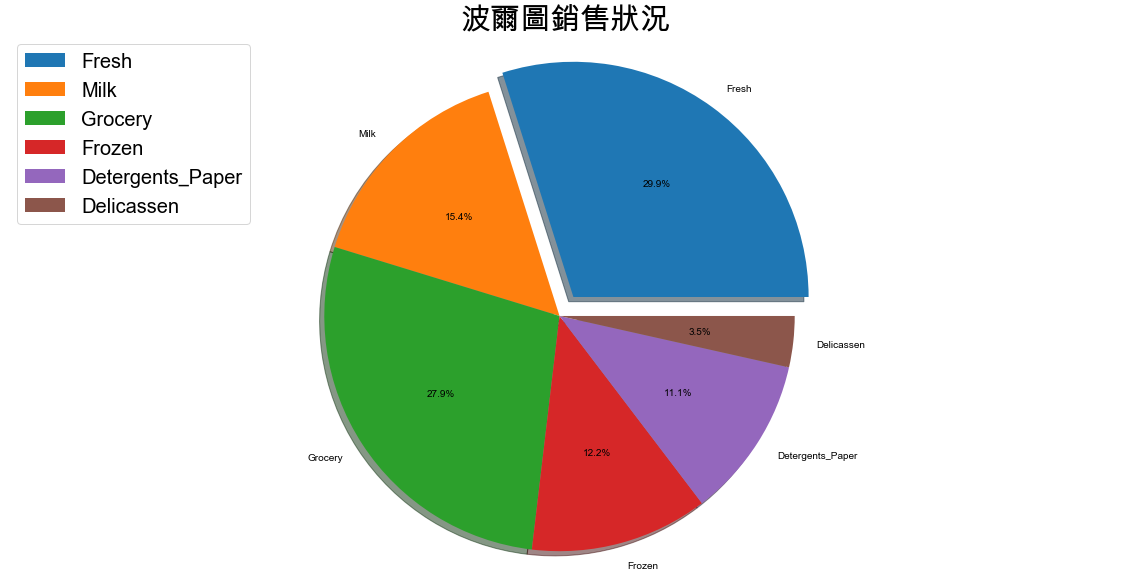

In [219]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
explode=(0.1,0,0,0,0,0)
plt.pie(
    Transaction_Porto.Transaction_averages,
    labels=Transaction_Porto['product'],
    autopct='%.1f%%',
    shadow=True,
    explode=explode
)
plt.axis('equal')
plt.title('波爾圖銷售狀況',fontsize=30)
plt.legend(loc=2,fontsize=20)
plt.savefig('波爾圖銷售狀況.jpg')
plt.show()

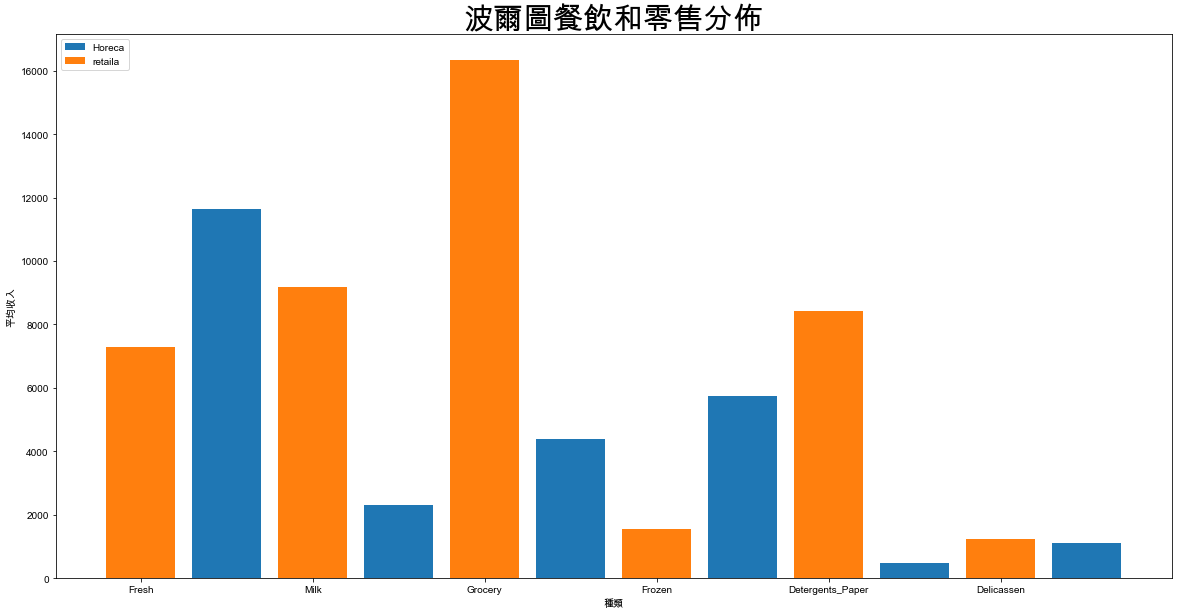

In [220]:
#查看餐飲和零售分佈
#餐飲
Horeca_Porto=df_2.loc[df_2['Channel']==1]
pp=means(Horeca_Porto)

mmd={'product':ind[2:8]}
Horeca_Porto=pd.DataFrame(mmd)
Horeca_Porto['Horeca_averages']=pp

#零售
retail_Porto=df_2.loc[df_2['Channel']==2]
pp=means(retail_Porto)

mmd={'product':ind[2:8]}
retail_Porto=pd.DataFrame(mmd)
retail_Porto['retaila_averages']=pp

index=range(len(retail_Porto['product'])*2)

#繪圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.bar(index[1::2],Horeca_Porto['Horeca_averages'],label='Horeca')
plt.bar(index[0::2],retail_Porto['retaila_averages'],label='retaila')
plt.xticks(index[0::2],retail_Porto['product'])
plt.title('波爾圖餐飲和零售分佈',fontsize=30)
plt.xlabel('種類')
plt.ylabel('平均收入')
plt.legend(loc=2)
plt.savefig('波爾圖餐飲和零售分佈.jpg')
plt.show()

>其他地區銷售狀況

In [186]:
df_3=Wholesale.loc[Wholesale['Region']==3]

otherareas=means(df_3)

mmd={'product':ind[2:8]}
Transaction_otherareas=pd.DataFrame(mmd)
Transaction_otherareas['Transaction_averages']=otherareas
Transaction_otherareas

,product,Transaction_averages
0,Fresh,12533.471519
1,Milk,5977.085443
2,Grocery,7896.363924
3,Frozen,2944.594937
4,Detergents_Paper,2817.753165
5,Delicassen,1620.601266


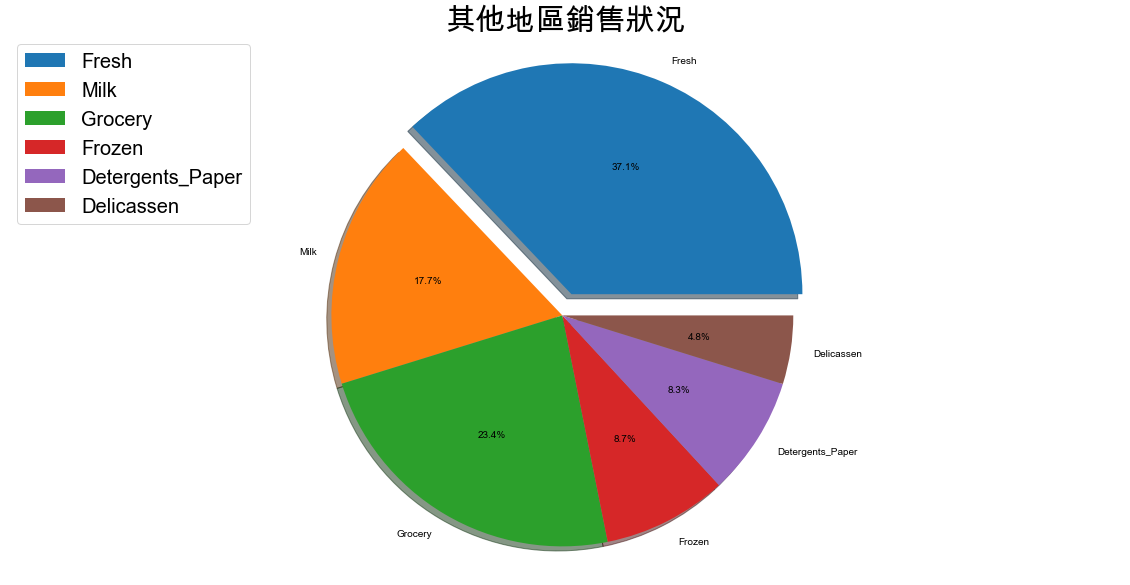

In [221]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
explode=(0.1,0,0,0,0,0)
plt.pie(
    Transaction_otherareas.Transaction_averages,
    labels=Transaction_otherareas['product'],
    autopct='%.1f%%',
    shadow=True,
    explode=explode
)
plt.axis('equal')
plt.title('其他地區銷售狀況',fontsize=30)
plt.legend(loc=2,fontsize=20)
plt.savefig('其他地區銷售狀況.jpg')
plt.show()

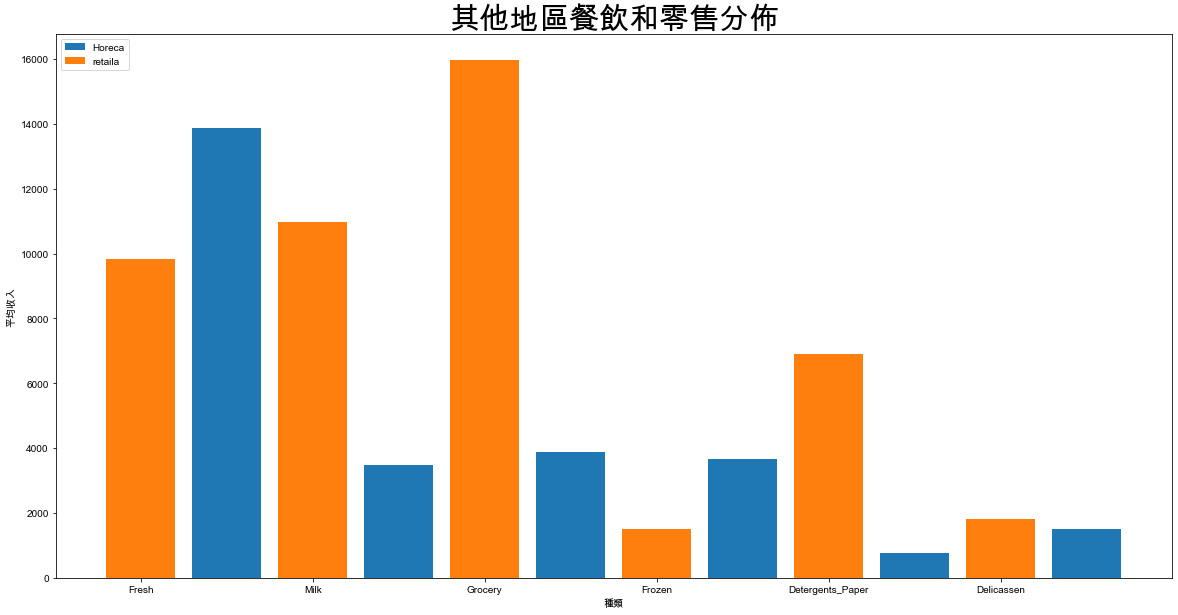

In [222]:
#查看餐飲和零售分佈
#餐飲
Horeca_otherareas=df_3.loc[df_3['Channel']==1]
pp=means(Horeca_otherareas)

mmd={'product':ind[2:8]}
Horeca_otherareas=pd.DataFrame(mmd)
Horeca_otherareas['Horeca_averages']=pp

#零售
retail_otherareas=df_3.loc[df_3['Channel']==2]
pp=means(retail_otherareas)

mmd={'product':ind[2:8]}
retail_otherareas=pd.DataFrame(mmd)
retail_otherareas['retaila_averages']=pp

index=range(len(retail_otherareas['product'])*2)

#繪圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.bar(index[1::2],Horeca_otherareas['Horeca_averages'],label='Horeca')
plt.bar(index[0::2],retail_otherareas['retaila_averages'],label='retaila')
plt.xticks(index[0::2],retail_otherareas['product'])
plt.title('其他地區餐飲和零售分佈',fontsize=30)
plt.xlabel('種類')
plt.ylabel('平均收入')
plt.legend(loc=2)
plt.savefig('其他地區餐飲和零售分佈.jpg')
plt.show()